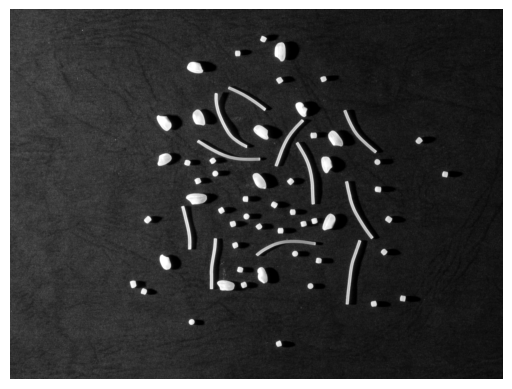

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
imagen = mpimg.imread('OriginalImage.tif')

# Show the greyscale image
plt.imshow(imagen, cmap='gray')

# Adjust the size of the graph to the image resolution
plt.axis('off')
plt.show()

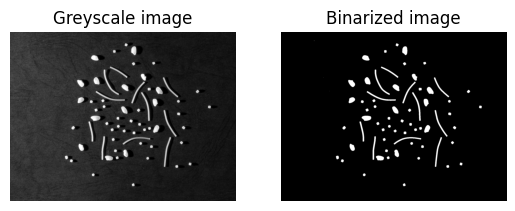

In [ ]:
import cv2
import matplotlib.pyplot as plt

imagen_gris = cv2.imread('OriginalImage.tif', cv2.IMREAD_GRAYSCALE)

# Binarize the image
_, imagen_binarizada = cv2.threshold(imagen_gris, 127, 255, cv2.THRESH_BINARY)

# Original greyscale image
plt.subplot(1, 2, 1)
plt.imshow(imagen_gris, cmap='gray')
plt.title('Greyscale image')
plt.axis('off')

# Binarized image
plt.subplot(1, 2, 2)
plt.imshow(imagen_binarizada, cmap='gray')
plt.title('Binarized image')
plt.axis('off')

plt.show()

15


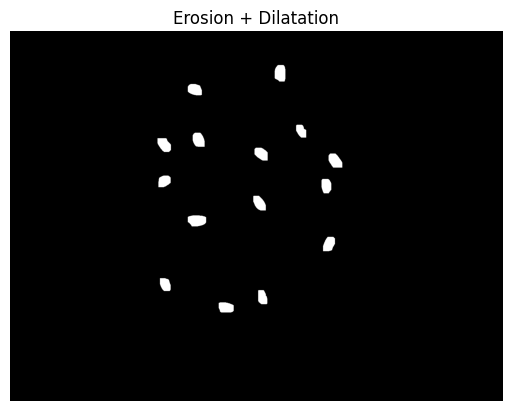

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Kernel definition for the erosion and dilatation
kernel = np.ones((17, 17), np.uint8)

# Erosion to erase small objects
imagen_erocionada = cv2.erode(imagen_binarizada, kernel, iterations=1)

# Dilatation to restaurate the original size of the rest of the objects
imagen_dilatada = cv2.dilate(imagen_erocionada, kernel, iterations=1)

# Count the pasta
contours, _ = cv2.findContours(imagen_dilatada, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

plt.imshow(imagen_dilatada, cmap='gray')
plt.title('Erosion + Dilatation')
plt.axis('off')

plt.show()

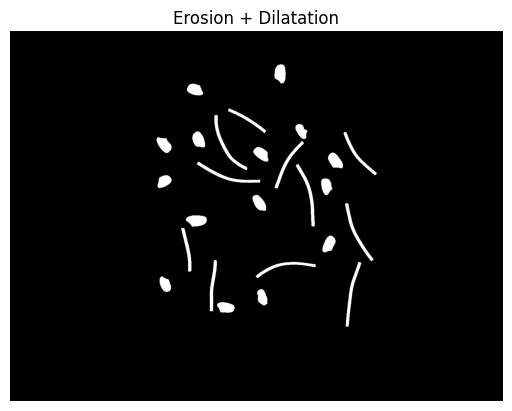

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Find the contours
contours, _ = cv2.findContours(imagen_binarizada, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Kernel definition for erosion and dilatation
kernel2 = np.ones((7, 7), np.uint8)

# Erosion to delete small objects
imagen_erocionada2 = cv2.erode(imagen_binarizada, kernel, iterations=1)

# Delete small contours
min_contour_area = 1000  # This can be adjusted
filtered_image = np.zeros_like(imagen_binarizada)
for contour in contours:
    if cv2.contourArea(contour) > min_contour_area:
        cv2.drawContours(filtered_image, [contour], 0, 255, thickness=cv2.FILLED)

plt.imshow(filtered_image, cmap='gray')
plt.title('Erosion + Dilatation')
plt.axis('off')

plt.show()

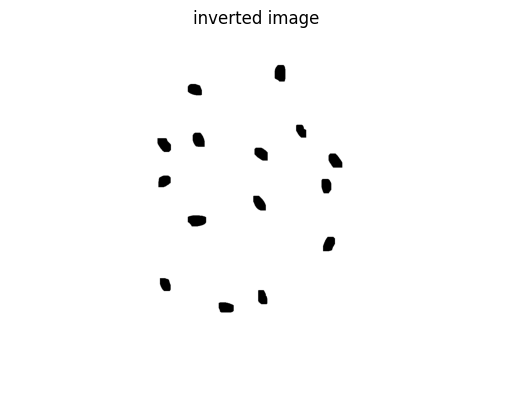

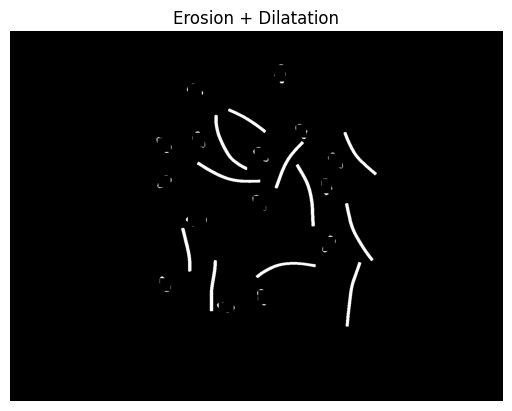

In [ ]:
import cv2
import numpy as np

# Invert the image of circular shapes to mark the areas to remove
img_circulares_inv = cv2.bitwise_not(imagen_dilatada)

# Apply an AND operation between the spaghetti image and the inverse of the circular shapes
result_img = cv2.bitwise_and(filtered_image, img_circulares_inv)


# Show the inverted image
plt.imshow(img_circulares_inv, cmap='gray')
plt.title('inverted image')
plt.axis('off')

plt.show()

# Show the result image
plt.imshow(result_img, cmap='gray')
plt.title('Erosion + Dilatation')
plt.axis('off')

plt.show()

11


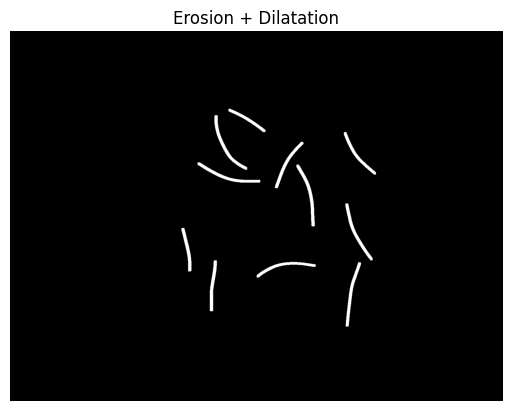

In [ ]:
# Kernel definition for erosion and dilatation
kernel3 = np.ones((7, 7), np.uint8)

# Erosion to eliminate small objects
imagen_erocionada3 = cv2.erode(result_img, kernel3, iterations=1)

# Dilation to restore the original size of the remaining objects
imagen_dilatada3 = cv2.dilate(imagen_erocionada3, kernel3, iterations=1)

# Count the spaguetti
contours, _ = cv2.findContours(imagen_dilatada3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

# Show the result images
plt.imshow(imagen_dilatada3, cmap='gray')
plt.title('Erosion + Dilatation')
plt.axis('off')

plt.show()

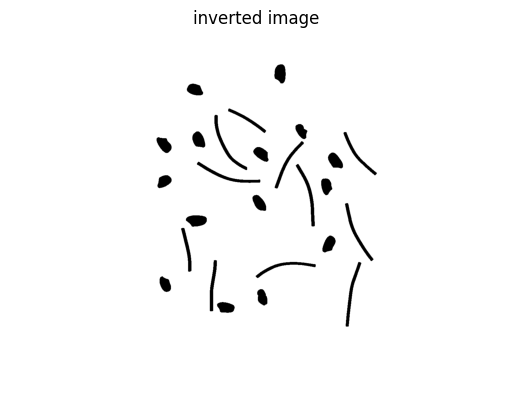

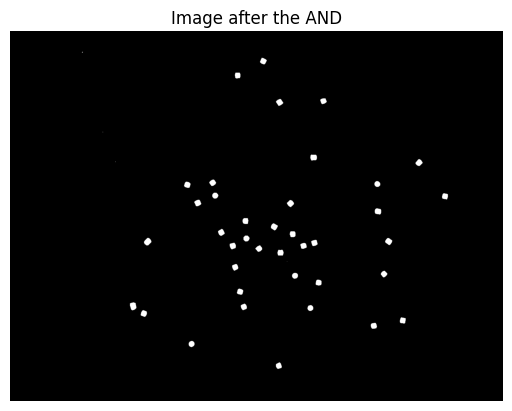

39


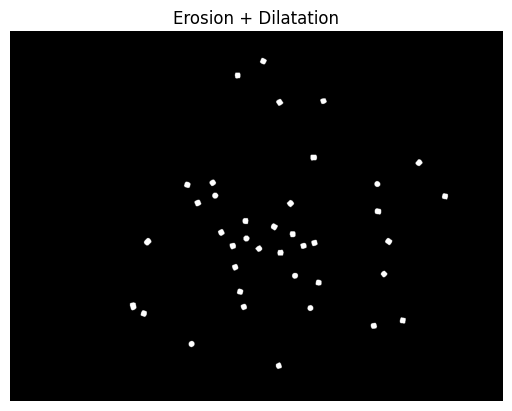

In [ ]:
import cv2
import numpy as np

# Invert the image of circular shapes to mark the areas you want to remove
img_circulares_inv2 = cv2.bitwise_not(filtered_image)

# Apply an AND operation between the spaghetti image and the inverse of the circular shapes
result_img2 = cv2.bitwise_and(imagen_binarizada, img_circulares_inv2)

# Show the inverted image
plt.imshow(img_circulares_inv2, cmap='gray')
plt.title('inverted image')
plt.axis('off')

plt.show()


# Show the result image
plt.imshow(result_img2, cmap='gray')
plt.title('Image after the AND')
plt.axis('off')

plt.show()


# There is noise, we apply erosion and dilatation
kernel3 = np.ones((3, 3), np.uint8)

# Erosion to eliminate small objects
imagen_erocionada4 = cv2.erode(result_img2, kernel3, iterations=1)

# Dilation to restore the original size of the remaining objects
imagen_dilatada4 = cv2.dilate(imagen_erocionada4, kernel3, iterations=1)

# Count the spaguetti
contours, _ = cv2.findContours(imagen_dilatada4, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

# Show the result images
plt.imshow(imagen_dilatada4, cmap='gray')
plt.title('Erosion + Dilatation')
plt.axis('off')

plt.show()

# ALGORITHM

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def Count_pasta(image_path):

    # Load and binarize the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, imagen_binarizada = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)


    # Pasta segmentation
    kernel_pasta = np.ones((17, 17), np.uint8)
    imagen_erocionada_pasta = cv2.erode(imagen_binarizada, kernel_pasta, iterations=1)
    imagen_dilatada = cv2.dilate(imagen_erocionada_pasta, kernel_pasta, iterations=1)
    contours_pasta, _ = cv2.findContours(imagen_dilatada, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)



    # Spaguetti segmentation

    kernel_spaguetti = np.ones((7, 7), np.uint8)
    imagen_erocionada2 = cv2.erode(imagen_binarizada, kernel_spaguetti, iterations=1)
    min_contour_area = 1000  # This can be adjusted
    filtered_image = np.zeros_like(imagen_binarizada)
    contours, _ = cv2.findContours(imagen_binarizada, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        if cv2.contourArea(contour) > min_contour_area:
            cv2.drawContours(filtered_image, [contour], 0, 255, thickness=cv2.FILLED)

    img_circulares_inv = cv2.bitwise_not(imagen_dilatada)
    result_img = cv2.bitwise_and(filtered_image, img_circulares_inv)
    imagen_erocionada3 = cv2.erode(result_img, kernel_spaguetti, iterations=1)
    imagen_dilatada3 = cv2.dilate(imagen_erocionada3, kernel_spaguetti, iterations=1)
    contours_spaguetti, _ = cv2.findContours(imagen_dilatada3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)



    # Grain segmentation
    img_circulares_inv2 = cv2.bitwise_not(filtered_image)
    result_img2 = cv2.bitwise_and(imagen_binarizada, img_circulares_inv2)
    kernel_grain = np.ones((3, 3), np.uint8)
    imagen_erocionada4 = cv2.erode(result_img2, kernel_grain, iterations=1)
    imagen_dilatada4 = cv2.dilate(imagen_erocionada4, kernel_grain, iterations=1)
    contours_grain, _ = cv2.findContours(imagen_dilatada4, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    # Show segmented images and the number of elements
    images = [imagen_dilatada, imagen_dilatada3, imagen_dilatada4]
    titles = [f'Pasta Count: {len(contours_pasta)}', f'Spaghetti Count: {len(contours_spaguetti)}', f'Grain Count: {len(contours_grain)}']

    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
        plt.show()


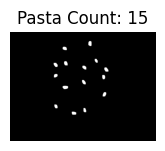

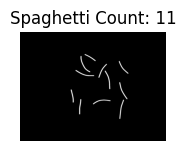

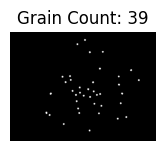

In [ ]:
Count_pasta('OriginalImage.tif')